In [1]:
import re
import math
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score , recall_score , confusion_matrix , f1_score
from sklearn.model_selection import GridSearchCV
from ast import literal_eval
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
from sklearn import datasets, metrics, model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
#data_train = pd.read_csv('./data/twitter_data_before_analysis.csv', error_bad_lines=False)
data_train = pd.read_csv('./data/twitter_data_before_analysis1.csv', error_bad_lines=False)
data_train = data_train.append(pd.read_csv('./data/ko_news_data_before_analysis.csv', error_bad_lines=False))
data_train = data_train.append(pd.read_csv('./data/en_news_data_before_analysis.csv', error_bad_lines=False))

In [3]:
data_train['period'] = pd.to_numeric(data_train['period'], errors='coerce')
data_train['category'] = pd.to_numeric(data_train['category'], errors='coerce')
data_train['label'] = pd.to_numeric(data_train['label'], errors='coerce')
data_train['Silhouette'] = pd.to_numeric(data_train['Silhouette'], errors='coerce')

In [4]:
print(len(data_train))

187533


In [5]:
X_train = data_train[data_train.columns.difference(['result'])]

In [6]:
#x_data_df = data_train[['period','raw_data','closer#','category','label','Silhouette']]
y_train = data_train['result']

In [7]:
X_train = X_train.drop('Unnamed: 0', axis=1)

In [8]:
eucl_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/after_down_ETH1_euclidean.csv', error_bad_lines=False)
eucl_data['closer#'] = 2 # cosine 1 , euclidean 2

cosine_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/after_down_ETH1_cosine.csv', error_bad_lines=False)
cosine_data['closer#'] = 1 # cosine 1 , euclidean 2

data_ETH1DA = eucl_data
data_ETH1DA.append(cosine_data)

data_ETH1DA['period'] = 201722 #  2017년 의 상반기 1 , 하반기 2 down 2, up 1

In [9]:
eucl_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/after_up_ETH1_euclidean.csv', error_bad_lines=False)
eucl_data['closer#'] = 2 # cosine 1 , euclidean 2

cosine_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/after_up_ETH1_cosine.csv', error_bad_lines=False)
cosine_data['closer#'] = 1 # cosine 1 , euclidean 2

data_ETH1UA = eucl_data
data_ETH1UA.append(cosine_data)

data_ETH1UA['period'] = 201721 # 2017년의 상반기 01 , 하반기 02

In [10]:
eucl_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/after_down_ETH0_euclidean.csv', error_bad_lines=False)
eucl_data['closer#'] = 2 # cosine 1 , euclidean 2

cosine_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/after_down_ETH0_cosine.csv', error_bad_lines=False)
cosine_data['closer#'] = 1 # cosine 1 , euclidean 2

data_ETH0DA = eucl_data
data_ETH0DA.append(cosine_data)

data_ETH0DA['period'] = 201712 #  2017년 의 상반기 1 , 하반기 2 down 2, up 1

In [11]:
eucl_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/after_up_ETH0_euclidean.csv', error_bad_lines=False)
eucl_data['closer#'] = 2 # cosine 1 , euclidean 2

cosine_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/after_up_ETH0_cosine.csv', error_bad_lines=False)
cosine_data['closer#'] = 1 # cosine 1 , euclidean 2

data_ETH0UA = eucl_data
data_ETH0UA.append(cosine_data)

data_ETH0UA['period'] = 201711 # 2017년의 상반기 01 , 하반기 02

In [12]:
eucl_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/after_down_ETH3_euclidean.csv', error_bad_lines=False)
eucl_data['closer#'] = 2 # cosine 1 , euclidean 2

cosine_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/after_down_ETH3_cosine.csv', error_bad_lines=False)
cosine_data['closer#'] = 1 # cosine 1 , euclidean 2

data_ETH3DA = eucl_data
data_ETH3DA.append(cosine_data)

data_ETH3DA['period'] = 201822 #  2017년 의 상반기 1 , 하반기 2 down 2, up 1

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [13]:
eucl_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/after_up_ETH3_euclidean.csv', error_bad_lines=False)
eucl_data['closer#'] = 2 # cosine 1 , euclidean 2

cosine_data = pd.read_csv('../../analysis/cluster/causeanalysis/ETH/after_up_ETH3_cosine.csv', error_bad_lines=False)
cosine_data['closer#'] = 1 # cosine 1 , euclidean 2

data_ETH3UA = eucl_data
data_ETH3UA.append(cosine_data)

data_ETH3UA['period'] = 201821 # 2017년의 상반기 01 , 하반기 02

In [14]:
data_test = pd.concat([data_ETH0DA,data_ETH0UA,data_ETH1DA,data_ETH1UA,data_ETH3DA,data_ETH3UA],ignore_index=True)

In [15]:
#data_test = pd.read_csv('./data/(test)_twitter_data_before_analysis.csv', error_bad_lines=False)
#data_test = data_test.append(pd.read_csv('./data/(test)_ko_news_data_before_analysis.csv', error_bad_lines=False))
#data_test = data_test.append(pd.read_csv('./data/(test)_en_news_data_before_analysis.csv', error_bad_lines=False))

In [16]:
data_test['period'] = pd.to_numeric(data_test['period'], errors='coerce')
data_test['category'] = pd.to_numeric(data_test['category'], errors='coerce')
data_test['label'] = pd.to_numeric(data_test['label'], errors='coerce')
data_test['Silhouette'] = pd.to_numeric(data_test['Silhouette'], errors='coerce')

In [17]:
print(len(data_test))

header = []
for i in range(1,101) :
    header.append('C'+str(i))

17072


In [18]:
X_test = data_test[['period','raw_data','closer#','category','label','Silhouette']]

In [19]:
y_test = data_test['result']

In [20]:
X_test['raw_data'] = X_test['raw_data'].apply(lambda x: x[1:len(x)-1].split(','))

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
tempFrame = pd.DataFrame(columns = header )

In [22]:
for index,row in X_test.iterrows() :

    raw_data_list = [float(i.replace(" ","")) for i in row['raw_data']]
    
    
    tempSeries = pd.Series(raw_data_list , index = header)
    
    tempFrame = tempFrame.append(tempSeries , ignore_index=True)
    
    if( (index%1000)==0 ) :
        print(index)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


In [23]:
tempFrame

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
0,0.002989,-0.006283,-0.005410,0.000804,0.000465,0.000671,0.003344,0.005094,-0.005191,-0.001740,...,0.000324,0.002127,-0.001174,0.002622,0.003714,-0.003480,-0.003968,0.001147,-0.001323,-0.005131
1,0.004920,-0.005912,-0.001951,-0.000643,0.000386,0.005405,-0.008218,0.008911,-0.001326,0.000794,...,0.001773,-0.004272,-0.003346,0.003727,0.004625,0.003656,-0.002899,0.003690,0.002147,-0.006938
2,0.001133,-0.007315,0.003047,0.000062,-0.002655,-0.002686,-0.005727,-0.000645,-0.002283,-0.001919,...,-0.003965,-0.000819,0.001653,-0.000098,-0.000725,0.003627,-0.006439,-0.004405,-0.000846,-0.006048
3,0.000731,-0.004788,0.001407,0.001084,0.001204,0.005527,0.003117,0.003234,-0.004184,0.003383,...,0.005378,0.001949,-0.005377,-0.000471,0.003429,-0.000249,-0.004514,-0.000137,0.005364,-0.006443
4,0.004627,-0.014411,-0.005994,-0.006631,-0.004966,0.001553,-0.006806,0.001887,-0.007137,0.003275,...,0.004105,0.000216,-0.000770,0.005190,0.005566,0.002684,-0.004876,0.000656,0.002028,-0.001617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17067,0.007526,-0.002671,0.002309,-0.013456,-0.000470,-0.017310,0.004136,0.009552,0.006085,0.000226,...,0.003353,0.008459,-0.003754,0.004204,-0.001407,-0.002353,0.000688,-0.001124,0.003302,0.002922
17068,0.001567,-0.001300,0.002105,-0.006347,-0.000569,-0.009777,-0.000747,0.003987,-0.001807,-0.000234,...,-0.002499,0.007150,0.001220,0.003238,-0.001786,-0.002352,0.003189,0.004044,-0.003393,-0.001776
17069,0.004602,0.004896,0.003056,-0.005731,-0.004453,-0.004570,0.003536,-0.001088,-0.001355,-0.000838,...,-0.002485,0.005599,-0.005524,-0.003416,0.004331,0.004369,0.004850,0.005045,0.000538,0.000404
17070,0.003545,-0.003215,-0.001435,-0.006063,0.001506,-0.006779,-0.002301,0.003430,0.006222,0.003096,...,0.003104,0.002369,-0.002822,0.005117,-0.002103,-0.004665,0.003331,0.003858,-0.000033,-0.002754


In [24]:
X_test = pd.concat([tempFrame,X_test],axis=1,ignore_index=False)

In [25]:
X_test = X_test.drop('raw_data', axis=1)

In [26]:
X_test

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C96,C97,C98,C99,C100,period,closer#,category,label,Silhouette
0,0.002989,-0.006283,-0.005410,0.000804,0.000465,0.000671,0.003344,0.005094,-0.005191,-0.001740,...,-0.003480,-0.003968,0.001147,-0.001323,-0.005131,201712,2,3,12.0,0.010984
1,0.004920,-0.005912,-0.001951,-0.000643,0.000386,0.005405,-0.008218,0.008911,-0.001326,0.000794,...,0.003656,-0.002899,0.003690,0.002147,-0.006938,201712,2,3,12.0,0.010984
2,0.001133,-0.007315,0.003047,0.000062,-0.002655,-0.002686,-0.005727,-0.000645,-0.002283,-0.001919,...,0.003627,-0.006439,-0.004405,-0.000846,-0.006048,201712,2,3,12.0,0.010984
3,0.000731,-0.004788,0.001407,0.001084,0.001204,0.005527,0.003117,0.003234,-0.004184,0.003383,...,-0.000249,-0.004514,-0.000137,0.005364,-0.006443,201712,2,3,12.0,0.010984
4,0.004627,-0.014411,-0.005994,-0.006631,-0.004966,0.001553,-0.006806,0.001887,-0.007137,0.003275,...,0.002684,-0.004876,0.000656,0.002028,-0.001617,201712,2,3,12.0,0.010984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17067,0.007526,-0.002671,0.002309,-0.013456,-0.000470,-0.017310,0.004136,0.009552,0.006085,0.000226,...,-0.002353,0.000688,-0.001124,0.003302,0.002922,201821,2,3,6.0,0.690571
17068,0.001567,-0.001300,0.002105,-0.006347,-0.000569,-0.009777,-0.000747,0.003987,-0.001807,-0.000234,...,-0.002352,0.003189,0.004044,-0.003393,-0.001776,201821,2,3,6.0,0.690571
17069,0.004602,0.004896,0.003056,-0.005731,-0.004453,-0.004570,0.003536,-0.001088,-0.001355,-0.000838,...,0.004369,0.004850,0.005045,0.000538,0.000404,201821,2,3,6.0,0.690571
17070,0.003545,-0.003215,-0.001435,-0.006063,0.001506,-0.006779,-0.002301,0.003430,0.006222,0.003096,...,-0.004665,0.003331,0.003858,-0.000033,-0.002754,201821,2,3,6.0,0.690571


In [27]:
rf_clf = RandomForestClassifier(random_state = 11 ,n_jobs=-1) # random forest

In [28]:
rf_clf.fit(X_train, y_train)

y_score = rf_clf.predict_proba(X_test)



In [29]:
rf_pred = rf_clf.predict(X_test)  # random forest predict

In [30]:
print('Random Forest Accuracy :  ',accuracy_score(y_test,rf_pred))
print('Random Forest Precision :  ',precision_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest Recall :  ',recall_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest f1 :  ',f1_score(y_test,rf_pred,pos_label='positive',average='weighted'))

Random Forest Accuracy :   0.5865745079662605
Random Forest Precision :   0.3440696533958606
Random Forest Recall :   0.5865745079662605
Random Forest f1 :   0.4337264360019296


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
y_score

array([[0.73, 0.19, 0.08],
       [0.66, 0.14, 0.2 ],
       [0.7 , 0.17, 0.13],
       ...,
       [0.71, 0.16, 0.13],
       [0.68, 0.17, 0.15],
       [0.8 , 0.11, 0.09]])

In [32]:
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[1, 2, 3])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])



0        2
1        2
2        2
3        2
4        2
        ..
17067    1
17068    1
17069    1
17070    1
17071    1
Name: result, Length: 17072, dtype: int64
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
class :  0 == 0.4331743366031676
class :  1 == 0.5252514572542617
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [33]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

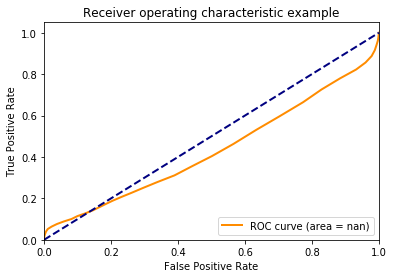

In [34]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

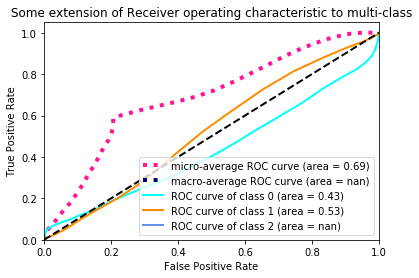

In [35]:
from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [36]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)

In [37]:
print('Decision Tree Accuracy :  ',accuracy_score(y_test,dt_pred))
print('Decision Tree Precision :  ',precision_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree Recall :  ',recall_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree f1 :  ',f1_score(y_test,dt_pred,pos_label='positive',average='weighted'))

Decision Tree Accuracy :   0.5865745079662605
Decision Tree Precision :   0.3440696533958606
Decision Tree Recall :   0.5865745079662605
Decision Tree f1 :   0.4337264360019296


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
y_score = dt_clf.predict_proba(X_test)

In [39]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [40]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.5
class :  1 == 0.5
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [41]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

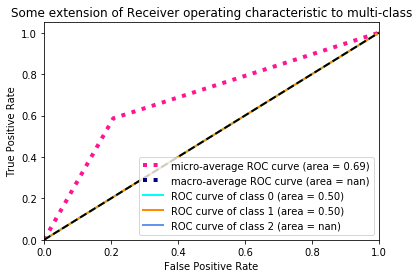

In [42]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [43]:
#gb_clf = GradientBoostingClassifier(random_state = 11) # random forest
lgbm_clf =  LGBMClassifier(random_state = 11)

In [44]:
#gb_clf.fit(X_train,y_train)
#gb_pred = gb_clf.predict(X_test)

lgbm_clf.fit(X_train,y_train)
lgbm_pred = lgbm_clf.predict(X_test)

In [45]:
#print('Gredient Boosting Accuracy :  ',accuracy_score(y_test,gb_pred))
#print('Gredient Boosting Precision :  ',precision_score(y_test,gb_pred,pos_label='positive',average='weighted'))
#print('Gredient Boosting Recall :  ',recall_score(y_test,gb_pred,pos_label='positive',average='weighted'))
#print('Gredient Boosting f1 :  ',f1_score(y_test,gb_pred,pos_label='positive',average='weighted'))
print('Light GBM Accuracy :  ',accuracy_score(y_test,lgbm_pred))
print('Light GBM Precision :  ',precision_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))
print('Light GBM Recall :  ',recall_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))
print('Light GBM f1 :  ',f1_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))

Light GBM Accuracy :   0.5865745079662605
Light GBM Precision :   0.3440696533958606
Light GBM Recall :   0.5865745079662605
Light GBM f1 :   0.4337264360019296


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
y_score = lgbm_clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

In [47]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.4358665012649052
class :  1 == 0.490678302572488
class :  2 == nan


In [48]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

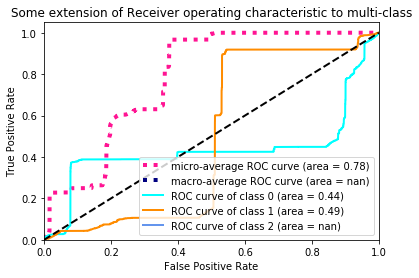

In [49]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [50]:
lr_clf = LogisticRegression(random_state = 11)

In [51]:
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)

In [52]:
print('Logistic Regression Accuracy :  ',accuracy_score(y_test,lr_pred))
print('Logistic Regression  Precision :  ',precision_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  Recall :  ',recall_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  f1 :  ',f1_score(y_test,lr_pred,pos_label='positive',average='weighted'))

Logistic Regression Accuracy :   0.5865745079662605
Logistic Regression  Precision :   0.3440696533958606
Logistic Regression  Recall :   0.5865745079662605
Logistic Regression  f1 :   0.4337264360019296


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
y_score = lr_clf.predict_proba(X_test)

y_score = np.round(y_score,5)

fpr = dict()
tpr = dict()
roc_auc = dict()

In [54]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.5
class :  1 == 0.5
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [55]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

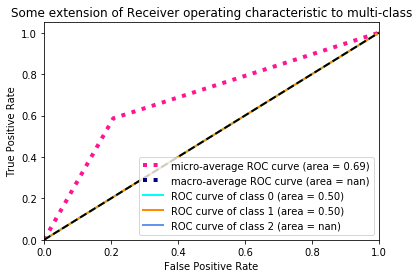

In [56]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [57]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [58]:
X_train

,C1,C10,C100,C11,C12,C13,C14,C15,C16,C17,...,C95,C96,C97,C98,C99,Silhouette,category,closer#,label,period
0,-0.001495,0.002059,-0.003641,0.002519,-0.000030,-0.000061,0.000266,-0.001268,-0.005870,0.004812,...,-0.001215,-0.005617,-0.000767,0.003659,-0.001297,0.126229,3.0,2,1.0,202011
1,-0.021860,0.025023,-0.030539,-0.053737,-0.034043,-0.106272,0.101318,0.046353,-0.032074,0.056494,...,-0.085919,-0.086635,-0.032728,0.003305,0.029844,0.126229,3.0,2,12.0,202011
2,-0.006153,0.000252,-0.000431,-0.007744,-0.001371,-0.012007,0.004584,-0.001146,-0.006225,0.003439,...,-0.002505,-0.002000,-0.006141,-0.000919,0.005992,0.126229,3.0,2,13.0,202011
3,-0.011715,0.010112,-0.014666,-0.018584,-0.010574,-0.035928,0.037478,0.020299,-0.011364,0.024920,...,-0.035902,-0.030800,-0.010657,0.002631,0.007532,0.126229,3.0,2,12.0,202011
4,-0.004312,0.010082,-0.009291,-0.017374,-0.011016,-0.033451,0.031159,0.015416,-0.016344,0.022197,...,-0.027211,-0.024827,-0.013575,-0.000735,0.013313,0.126229,3.0,2,12.0,202011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112261,0.002639,-0.007745,0.015926,-0.011952,-0.002111,-0.004357,-0.000599,-0.012847,-0.000155,-0.024394,...,0.005706,0.015451,0.006023,0.001769,0.004318,0.746625,1.0,2,5.0,201924
112262,-0.000535,-0.008106,0.016009,-0.012102,0.005943,-0.004983,-0.004764,-0.011634,0.001370,-0.025071,...,0.004042,0.014530,-0.000182,0.002224,-0.003322,0.746625,1.0,2,5.0,201924
112263,0.004187,0.000229,0.007715,-0.005602,0.004873,-0.005352,-0.002468,-0.003581,0.005097,-0.003656,...,-0.003402,0.004426,-0.001443,0.001934,-0.000474,0.746625,1.0,2,5.0,201924
112264,-0.002951,-0.006462,0.012489,-0.003590,-0.002220,-0.002896,-0.001683,-0.016026,0.004791,-0.019189,...,0.003951,0.013484,0.002950,0.001749,0.001292,0.746625,1.0,2,5.0,201924


In [59]:
model = Sequential()
model.add(Dense(120, input_dim=105, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [60]:
# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
from keras.utils import to_categorical

y_train = y_train.apply(lambda x : x-1)

In [62]:
y_cate_train = to_categorical(y_train , num_classes=3)
#y_cate_train = y_train

In [63]:
y_cate_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [64]:
#y_cate_train = list(y_train)

In [65]:
#X_train

In [66]:
model.fit(X_train,y_cate_train, epochs=30, batch_size=500)

Epoch 1/30
187533/187533 [==============================] - 1s 7us/step - loss: 247.4764 - accuracy: 0.3959
Epoch 2/30
187533/187533 [==============================] - 1s 6us/step - loss: 77.8606 - accuracy: 0.3970
Epoch 3/30
187533/187533 [==============================] - 1s 6us/step - loss: 39.0439 - accuracy: 0.3953
Epoch 4/30
187533/187533 [==============================] - 1s 6us/step - loss: 21.9444 - accuracy: 0.3985
Epoch 5/30
187533/187533 [==============================] - 1s 6us/step - loss: 11.3621 - accuracy: 0.3977
Epoch 6/30
187533/187533 [==============================] - 1s 6us/step - loss: 5.1637 - accuracy: 0.4054
Epoch 7/30
187533/187533 [==============================] - 1s 6us/step - loss: 4.6641 - accuracy: 0.4002
Epoch 8/30
187533/187533 [==============================] - 1s 6us/step - loss: 1.7521 - accuracy: 0.4296
Epoch 9/30
187533/187533 [==============================] - 1s 6us/step - loss: 2.2450 - accuracy: 0.4258
Epoch 10/30
187533/187533 [=============

In [67]:
X_test

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C96,C97,C98,C99,C100,period,closer#,category,label,Silhouette
0,0.002989,-0.006283,-0.005410,0.000804,0.000465,0.000671,0.003344,0.005094,-0.005191,-0.001740,...,-0.003480,-0.003968,0.001147,-0.001323,-0.005131,201712,2,3,12.0,0.010984
1,0.004920,-0.005912,-0.001951,-0.000643,0.000386,0.005405,-0.008218,0.008911,-0.001326,0.000794,...,0.003656,-0.002899,0.003690,0.002147,-0.006938,201712,2,3,12.0,0.010984
2,0.001133,-0.007315,0.003047,0.000062,-0.002655,-0.002686,-0.005727,-0.000645,-0.002283,-0.001919,...,0.003627,-0.006439,-0.004405,-0.000846,-0.006048,201712,2,3,12.0,0.010984
3,0.000731,-0.004788,0.001407,0.001084,0.001204,0.005527,0.003117,0.003234,-0.004184,0.003383,...,-0.000249,-0.004514,-0.000137,0.005364,-0.006443,201712,2,3,12.0,0.010984
4,0.004627,-0.014411,-0.005994,-0.006631,-0.004966,0.001553,-0.006806,0.001887,-0.007137,0.003275,...,0.002684,-0.004876,0.000656,0.002028,-0.001617,201712,2,3,12.0,0.010984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17067,0.007526,-0.002671,0.002309,-0.013456,-0.000470,-0.017310,0.004136,0.009552,0.006085,0.000226,...,-0.002353,0.000688,-0.001124,0.003302,0.002922,201821,2,3,6.0,0.690571
17068,0.001567,-0.001300,0.002105,-0.006347,-0.000569,-0.009777,-0.000747,0.003987,-0.001807,-0.000234,...,-0.002352,0.003189,0.004044,-0.003393,-0.001776,201821,2,3,6.0,0.690571
17069,0.004602,0.004896,0.003056,-0.005731,-0.004453,-0.004570,0.003536,-0.001088,-0.001355,-0.000838,...,0.004369,0.004850,0.005045,0.000538,0.000404,201821,2,3,6.0,0.690571
17070,0.003545,-0.003215,-0.001435,-0.006063,0.001506,-0.006779,-0.002301,0.003430,0.006222,0.003096,...,-0.004665,0.003331,0.003858,-0.000033,-0.002754,201821,2,3,6.0,0.690571


In [68]:
y_test = y_test.apply(lambda x : x-1)

In [69]:
y_cate_test = to_categorical(y_test , num_classes=3)

In [70]:
y_cate_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [71]:
score = model.evaluate(X_test, y_cate_test, batch_size=500)

17072/17072 [==============================] - 0s 4us/step


In [72]:
#score = model.evaluate(X_test, y_cate_test, batch_size=500)

In [73]:
score

[148.43563024240223, 0.4134255051612854]

In [74]:
yhat_probs = model.predict(X_test ,batch_size=500 )

yhat_classes = model.predict_classes(X_test ,batch_size=500 )

# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

In [75]:
yhat_probs

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [76]:
yhat_classes

array([1, 1, 1, ..., 1, 1, 1])

In [77]:
y_cate_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [78]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes )
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes , average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes , average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.413425
Precision: 0.413425
Recall: 0.413425
F1 score: 0.413425


In [79]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[0, 1, 2])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], yhat_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

0        1
1        1
2        1
3        1
4        1
        ..
17067    0
17068    0
17069    0
17070    0
17071    0
Name: result, Length: 17072, dtype: int64
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
class :  0 == 0.5
class :  1 == 0.5
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [80]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), yhat_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

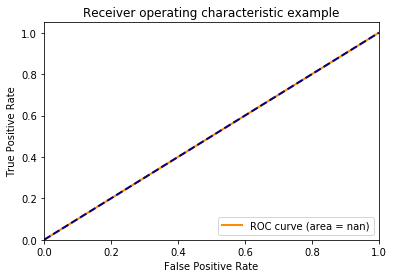

In [81]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


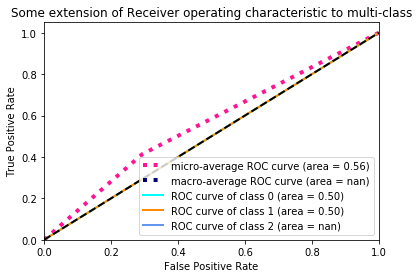

In [82]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [83]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes )
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes , average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes , average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.413425
Precision: 0.413425
Recall: 0.413425
F1 score: 0.413425


In [84]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[0, 1, 2])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], yhat_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

0        1
1        1
2        1
3        1
4        1
        ..
17067    0
17068    0
17069    0
17070    0
17071    0
Name: result, Length: 17072, dtype: int64
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
class :  0 == 0.5
class :  1 == 0.5
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [85]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), yhat_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

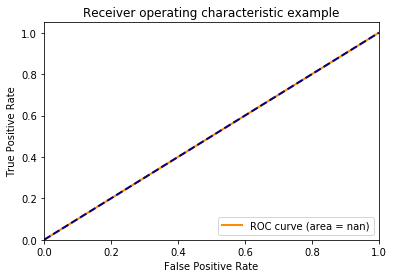

In [86]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


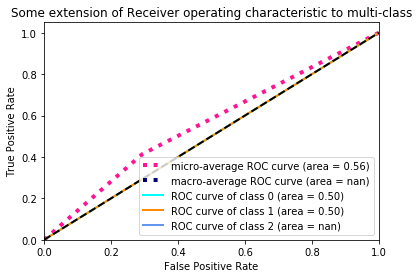

In [87]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [88]:
eth_afterset = pd.concat([X_test,y_test],axis=1)

In [89]:
eth_afterset.to_csv('../../analysis/cluster/causeanalysis/ETH/after_ETH_total.csv')